<a href="https://colab.research.google.com/github/HeptaDecane/LP1_SEM7/blob/main/C04/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C04/Train.csv --output Train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3030k  100 3030k    0     0  5136k      0 --:--:-- --:--:-- --:--:-- 5136k


In [3]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C04/Test.csv --output Test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1597k  100 1597k    0     0  2648k      0 --:--:-- --:--:-- --:--:-- 2644k


In [4]:
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [5]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [6]:
train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


([<matplotlib.patches.Wedge at 0x7f5a26e44690>,
 [Text(-1.073398425069864, 0.24044920681411253, ''),
  Text(1.0733984363261024, -0.2404491565647056, 'Hate')],
 [Text(-0.5854900500381076, 0.13115411280769773, '92.99'),
  Text(0.585490056177874, -0.13115408539893034, '7.01')])

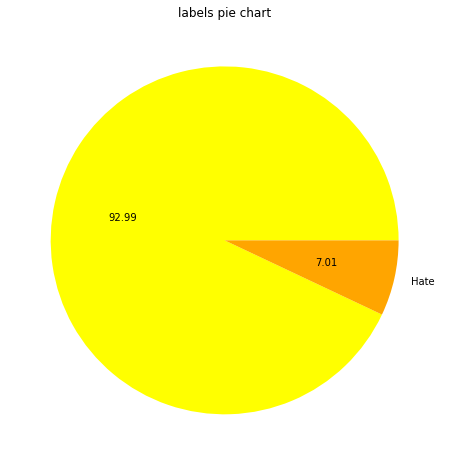

In [29]:
fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('labels pie chart')
plt.pie(train_df['label'].value_counts(),labels=[None,'Hate'],autopct='%.2f',colors=['yellow','orange'])